In [12]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\BahiJaan\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [13]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\BahiJaan\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [14]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\BahiJaan\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [16]:
df=pd.read_csv(r'E:\Chronic Disease Data\Project 2-Chronic Kidney Disease/kidney_disease.csv')

In [17]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [18]:
columns=pd.read_csv('E:\Chronic Disease Data\Project 2-Chronic Kidney Disease/data_description.txt',sep='-')
columns=columns.reset_index()

In [19]:
columns.columns=['cols','abb_col_names']
columns

,cols,abb_col_names
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [20]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [21]:
columns['abb_col_names'].values
df.columns=columns['abb_col_names'].values
df.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [22]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [23]:
def convert_dtype(df,feature):
    df[feature]=pd.to_numeric(df[feature],errors='coerce')

In [24]:
features=['packed cell volume','white blood cell count','red blood cell count']

for feature in features:
    convert_dtype(df,feature)

In [25]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [26]:
df.drop('id',axis=1,inplace=True)

In [27]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [28]:
def extract_cat_num(df):
    cat_col=[col for col in df.columns if df[col].dtype=='object']
    num_col=[col for col in df.columns if df[col].dtype!='object']
    return cat_col,num_col

In [29]:
cat_col,num_col=extract_cat_num(df)

In [30]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [31]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [32]:
for col in cat_col:
    print(' {} has {} values'.format(col,df[col].unique()))
    print('\n')

 red blood cells has [nan 'normal' 'abnormal'] values


  pus cell has ['normal' 'abnormal' nan] values


 pus cell clumps has ['notpresent' 'present' nan] values


 bacteria has ['notpresent' 'present' nan] values


 ypertension has ['yes' 'no' nan] values


 diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values


 coronary artery disease has ['no' 'yes' '\tno' nan] values


 appetite has ['good' 'poor' nan] values


 pedal edema has ['no' 'yes' nan] values


 anemia has ['no' 'yes' nan] values


 class has ['ckd' 'ckd\t' 'notckd'] values




In [33]:
df['diabetes mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes'},inplace=True)

df['coronary artery disease']=df['coronary artery disease'].replace(to_replace='\tno',value='no')
df['class']=df['class'].replace(to_replace='ckd\t',value='ckd')



In [34]:
for col in cat_col:
    print(' {} has {} values'.format(col,df[col].unique()))
    print('\n')

 red blood cells has [nan 'normal' 'abnormal'] values


  pus cell has ['normal' 'abnormal' nan] values


 pus cell clumps has ['notpresent' 'present' nan] values


 bacteria has ['notpresent' 'present' nan] values


 ypertension has ['yes' 'no' nan] values


 diabetes mellitus has ['yes' 'no' ' yes' nan] values


 coronary artery disease has ['no' 'yes' nan] values


 appetite has ['good' 'poor' nan] values


 pedal edema has ['no' 'yes' nan] values


 anemia has ['no' 'yes' nan] values


 class has ['ckd' 'notckd'] values




In [35]:
len(num_col)

14

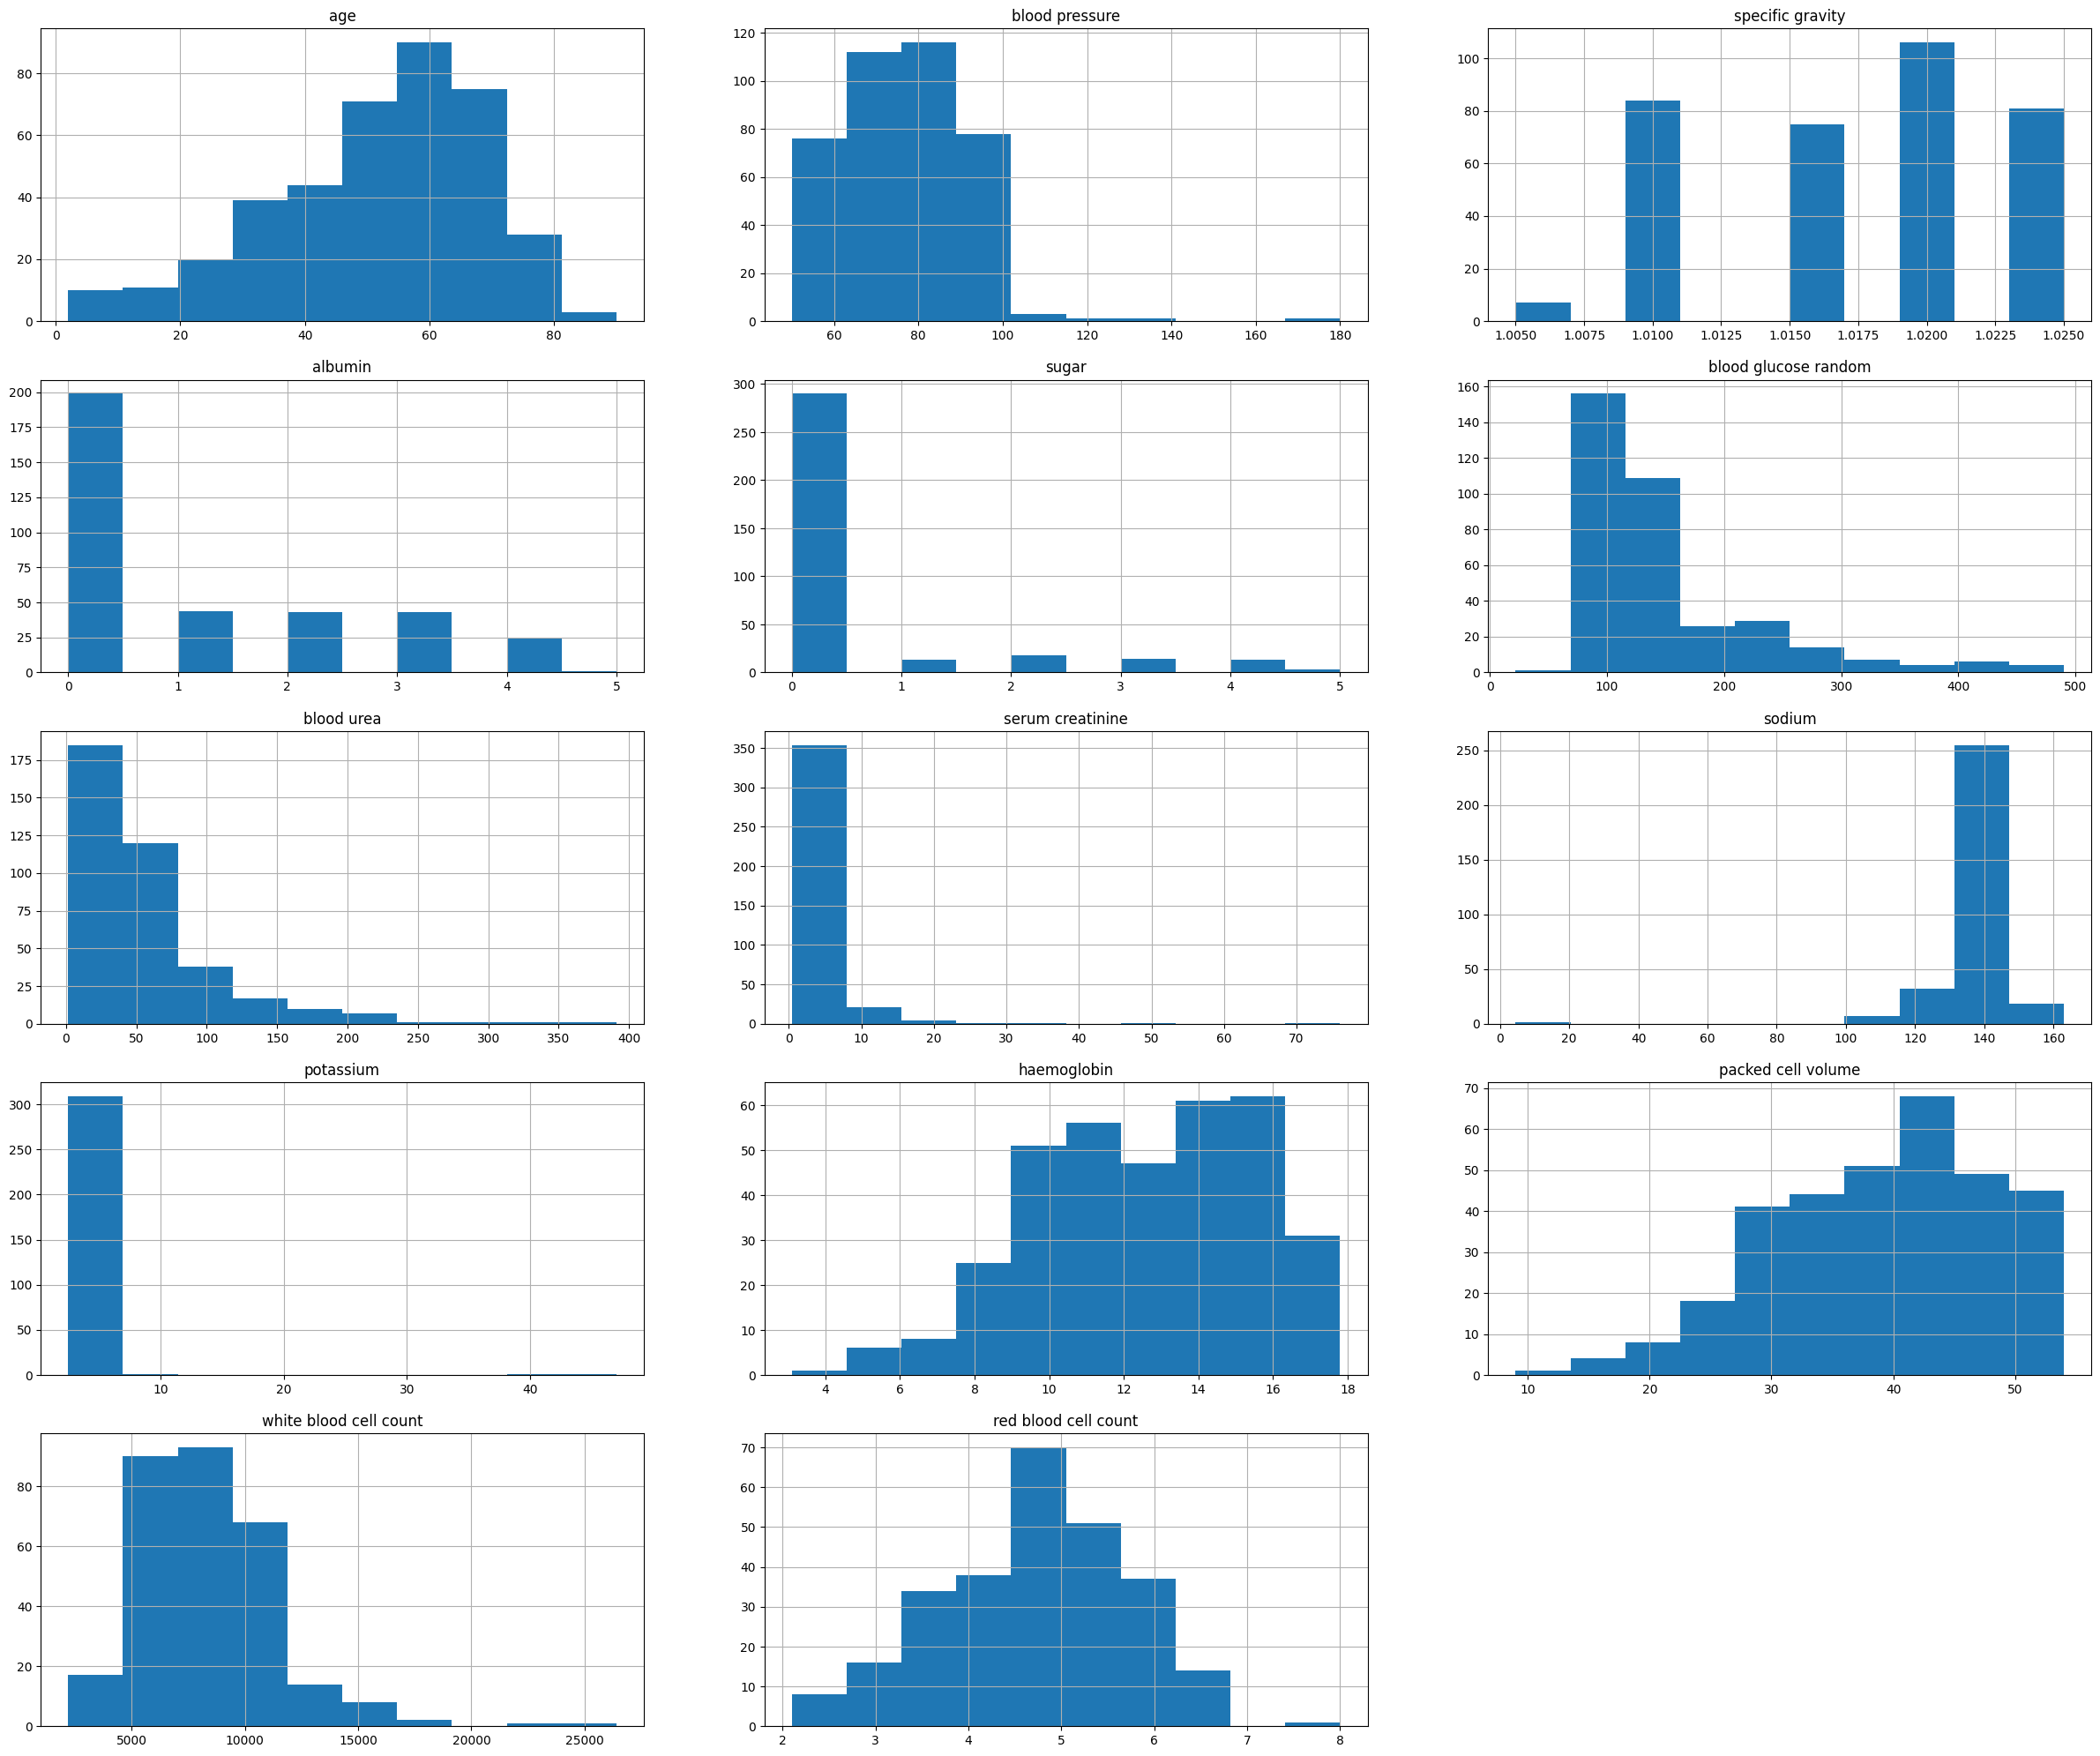

In [36]:
plt.figure(figsize=(30,25))

for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature)

In [37]:
##CHEKING CATAGORICAL DATA
### ckd (A person having Chorin disease),  notckd (Not haing chronic disease)


In [38]:
len(cat_col)

11

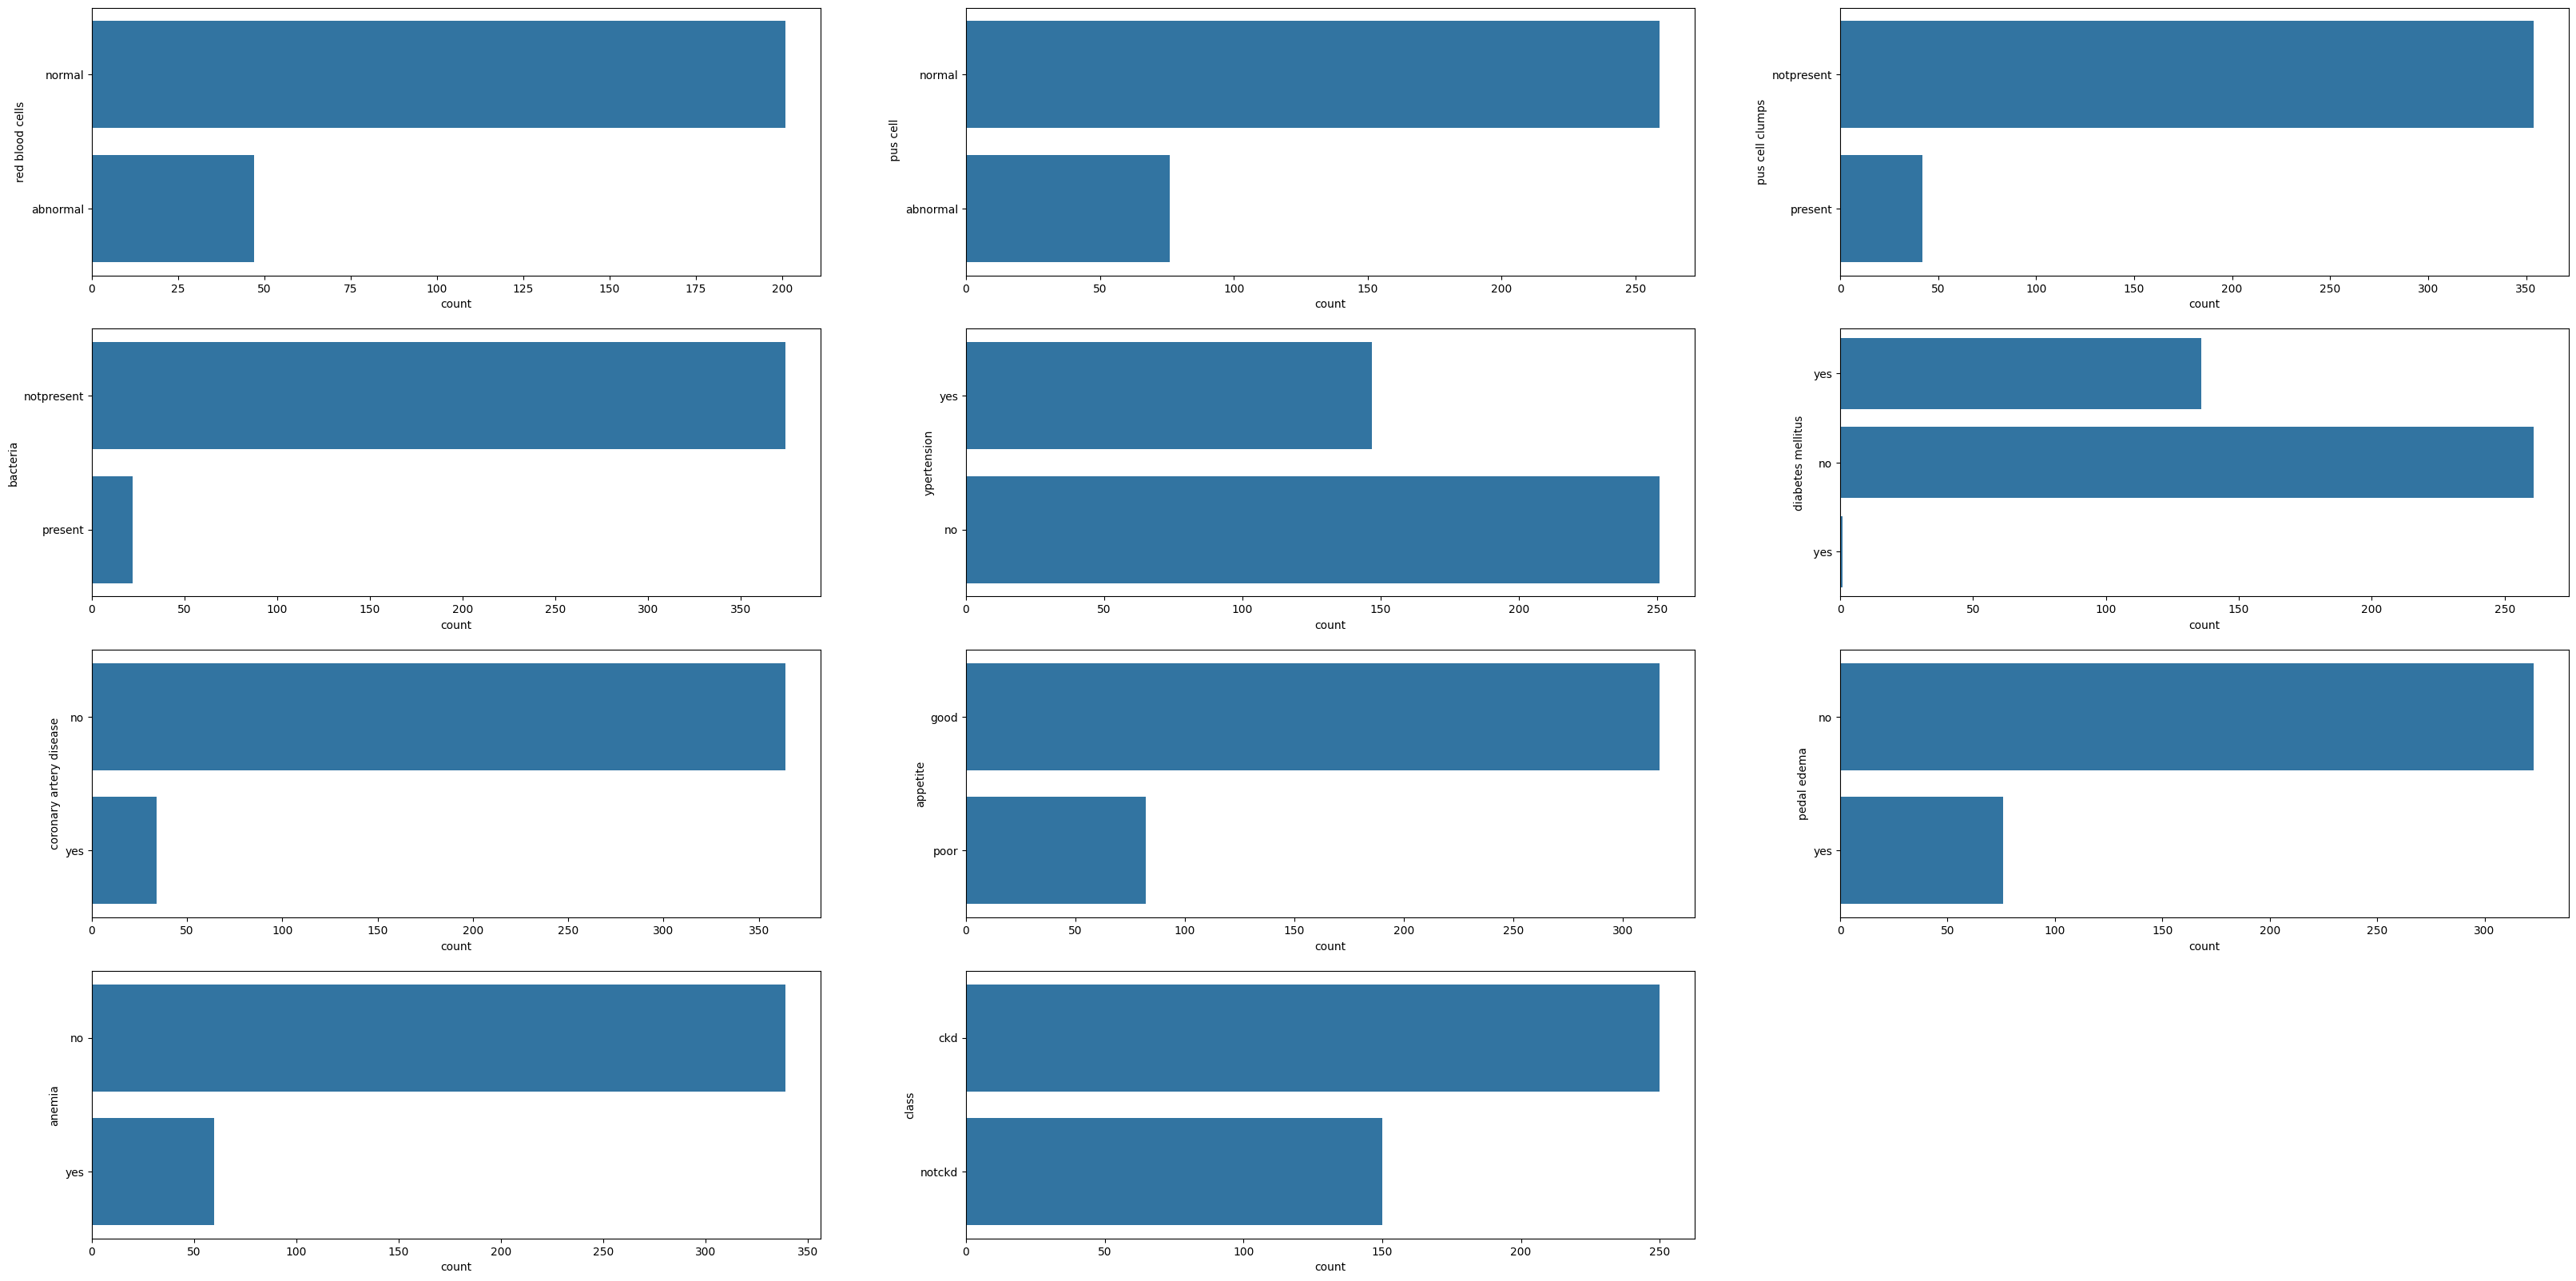

In [39]:
plt.figure(figsize=(40,20))

for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feature])
    

<Axes: xlabel='count', ylabel='red blood cells'>

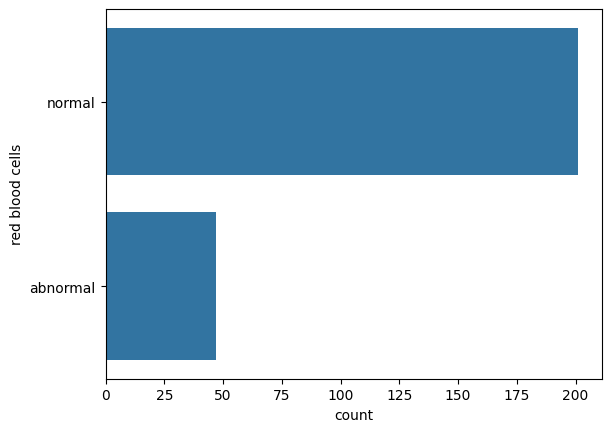

In [40]:
sns.countplot(df['red blood cells'])

In [41]:
df[num_col].corr()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896
blood pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
specific gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448
blood glucose random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
blood urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
serum creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873
potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309


<Axes: >

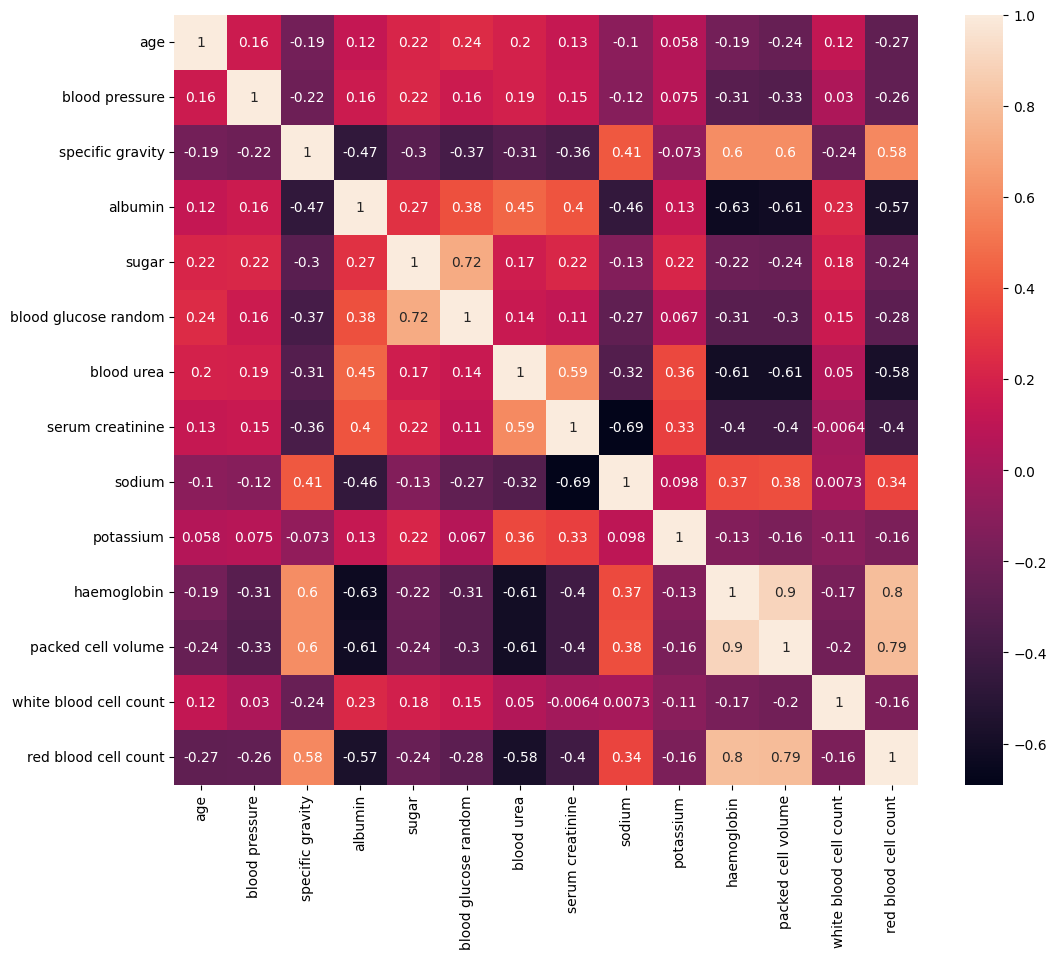

In [42]:
plt.figure(figsize=(12,10))
df[num_col].corr()
sns.heatmap(df[num_col].corr(),annot=True)

In [43]:
df.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

In [44]:
!pip install plotly


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\BahiJaan\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [45]:
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

px.violin(df,x='red blood cell count',y='class')


<Axes: xlabel='class', ylabel='red blood cell count'>

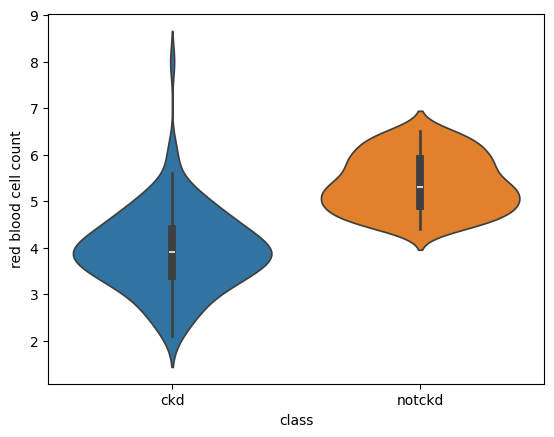

In [46]:
#sns.catplot(df,y='red blood cell count',x='class')
sns.violinplot(df, y="red blood cell count", x="class",hue="class")

<Axes: xlabel='haemoglobin', ylabel='packed cell volume'>

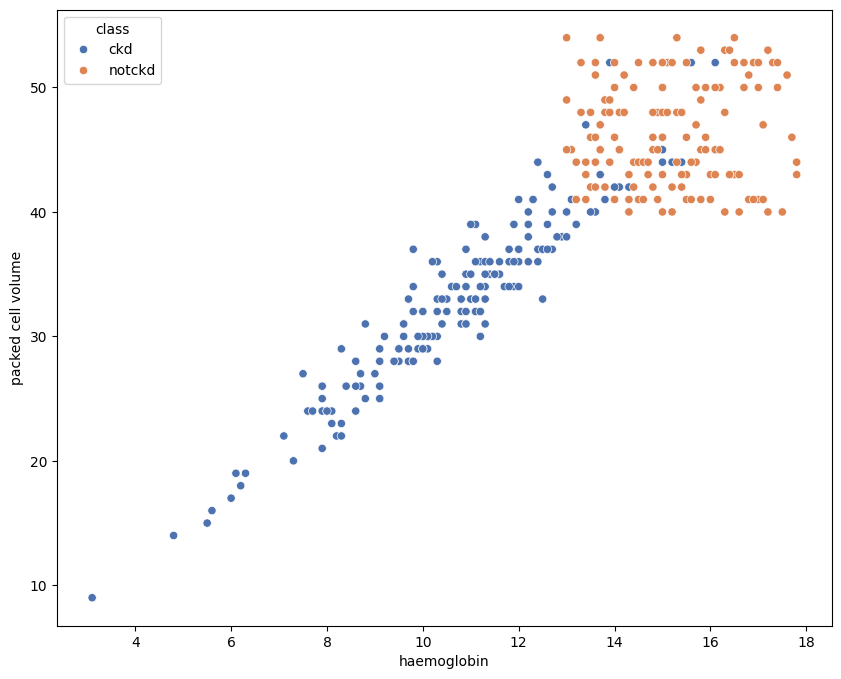

In [47]:
#px.scatter(df,x='haemoglobin',y='packed cell volume')
plt.figure(figsize=(10,8))
sns.scatterplot(df, x="haemoglobin", y="packed cell volume",hue='class',palette="deep")

C:\Users\BahiJaan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


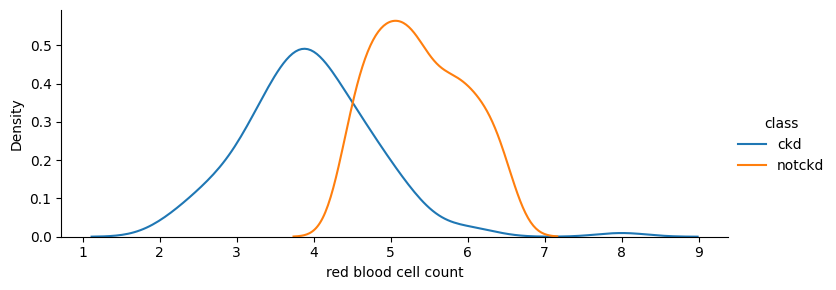

In [48]:
grid=sns.FacetGrid(df,hue='class',aspect=2.5)
grid.map(sns.kdeplot,'red blood cell count')
grid.add_legend()


In [49]:
#Functions to Automate the Analysis

In [50]:
#Funcition for Violin Plot
def violin(col):
    fig=sns.violinplot(df, y=col, x="class",hue="class")
    return fig

<Axes: xlabel='class', ylabel='potassium'>

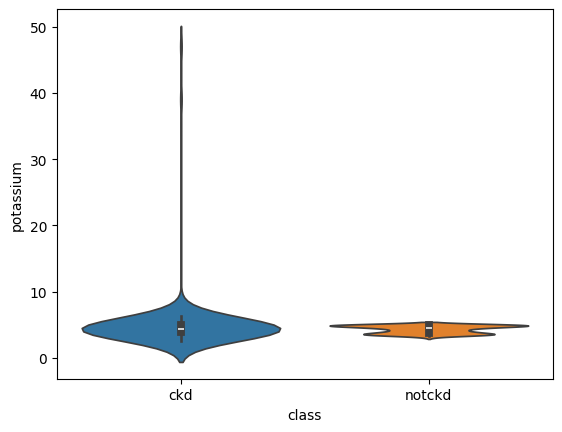

In [51]:
violin('potassium')

In [52]:
#Funcition for Scattar Plots
def scatters(col1,col2):
    plt.figure(figsize=(10,8))
    fig=sns.scatterplot(df, x=col1, y=col2,hue='class',palette="deep")
    return fig

<Axes: xlabel='packed cell volume', ylabel='haemoglobin'>

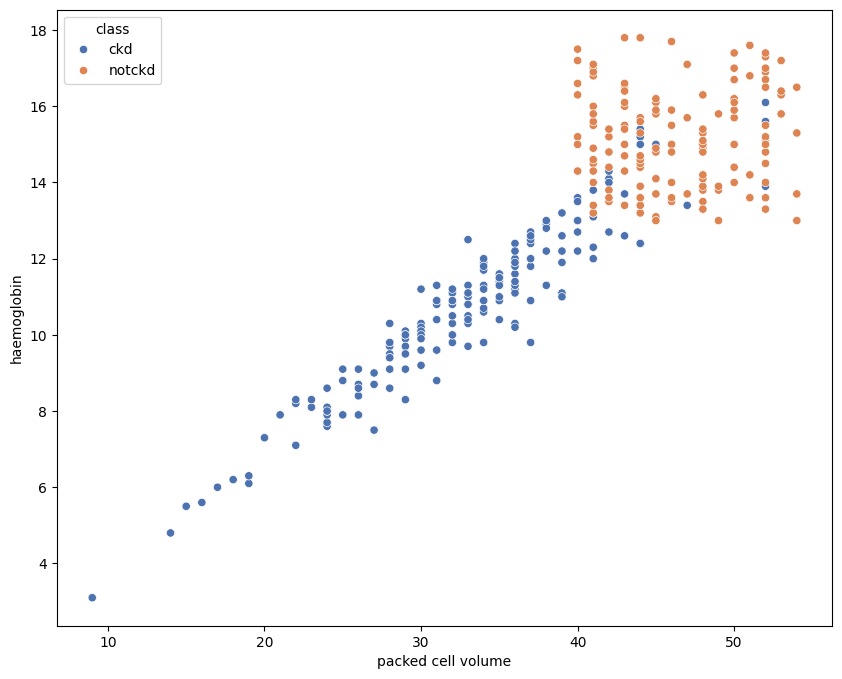

In [53]:
scatters('packed cell volume','haemoglobin')

In [54]:
#Funcition for KDE (Kernal Density Estimation) Plots
def kde_plot(feature):
    grid=sns.FacetGrid(df,hue='class',aspect=2.5)
    grid.map(sns.kdeplot,feature)
    grid.add_legend()

C:\Users\BahiJaan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


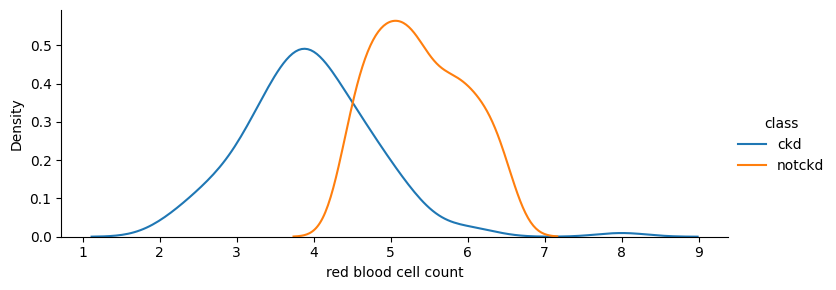

In [55]:
kde_plot('red blood cell count')

C:\Users\BahiJaan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


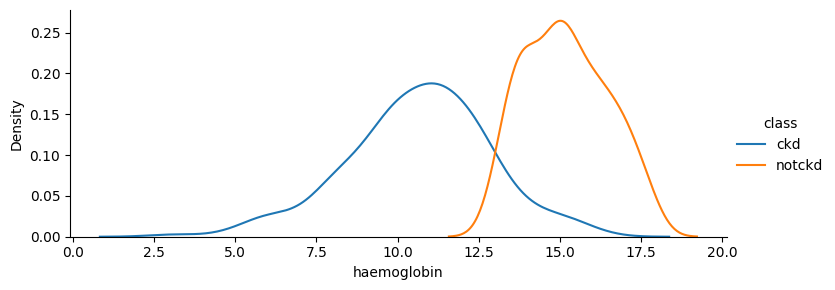

In [56]:
kde_plot('haemoglobin')

<Axes: xlabel='packed cell volume', ylabel='red blood cell count'>

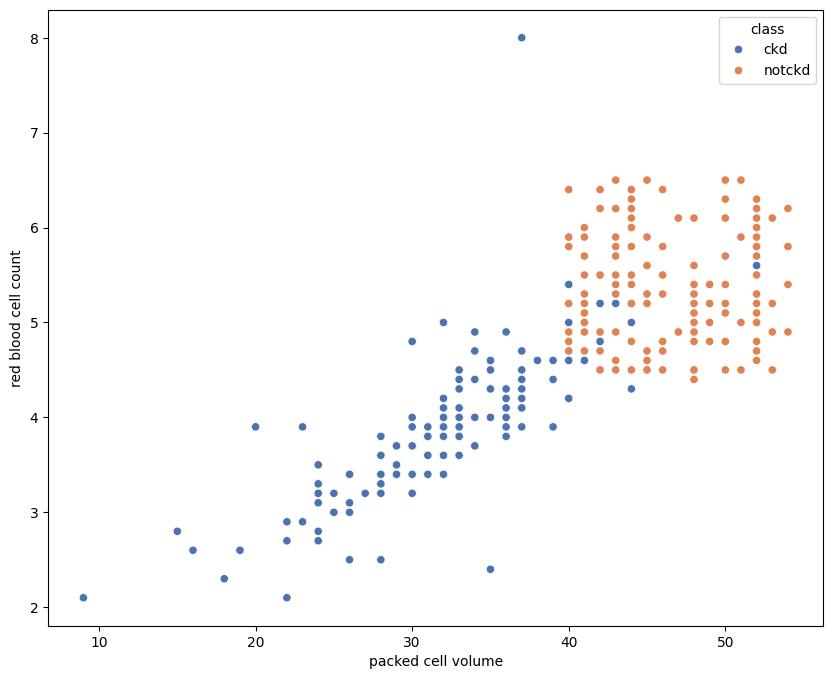

In [57]:
scatters('packed cell volume','red blood cell count')

<Axes: xlabel='haemoglobin', ylabel='red blood cell count'>

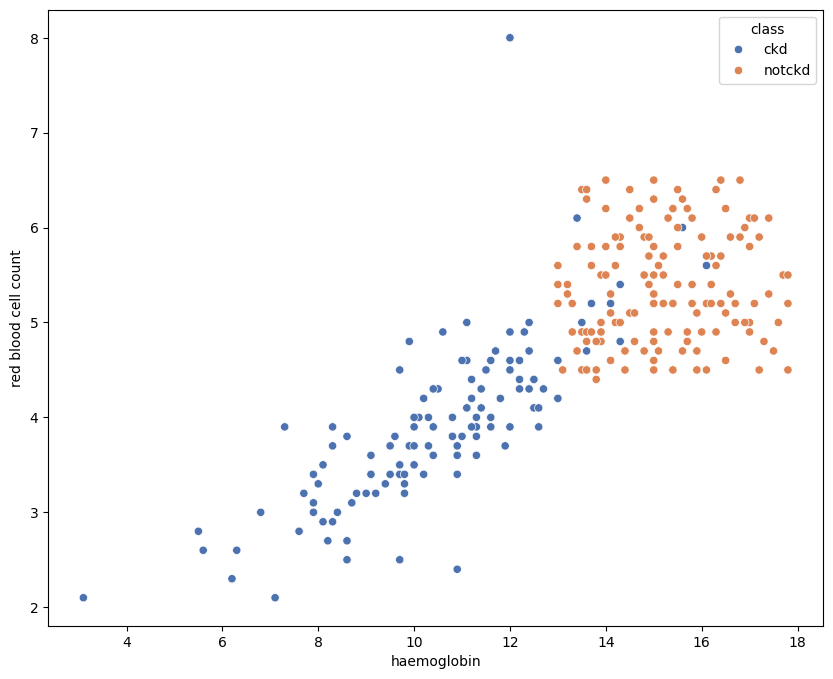

In [58]:
scatters('haemoglobin','red blood cell count')

<Axes: xlabel='packed cell volume', ylabel='haemoglobin'>

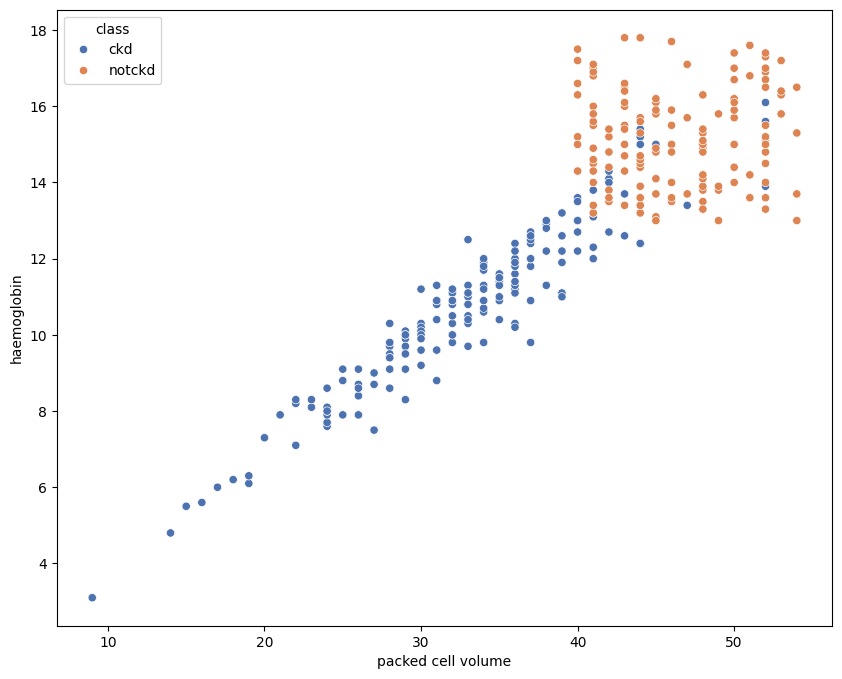

In [59]:
scatters('packed cell volume','haemoglobin')

<Axes: xlabel='class', ylabel='red blood cell count'>

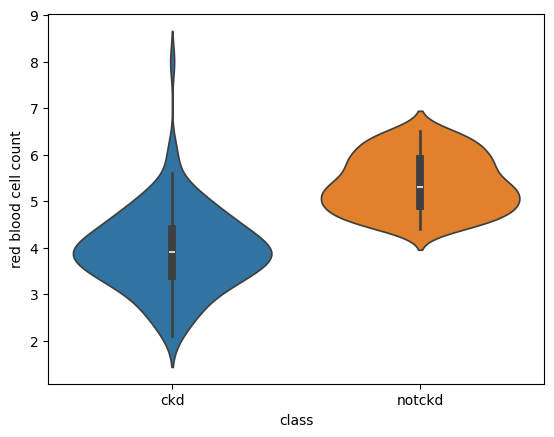

In [60]:
violin('red blood cell count')

<Axes: xlabel='class', ylabel='packed cell volume'>

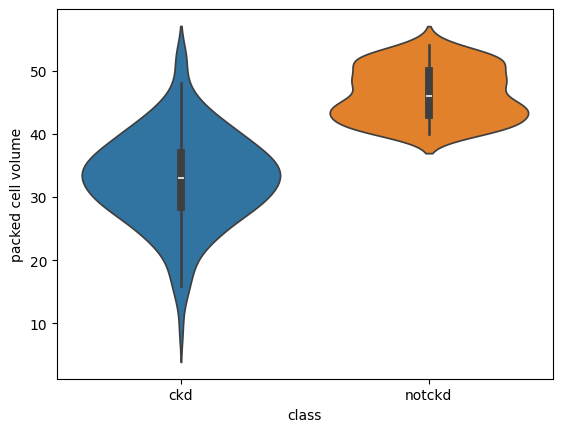

In [61]:
violin("packed cell volume")

<Axes: xlabel='red blood cell count', ylabel='albumin'>

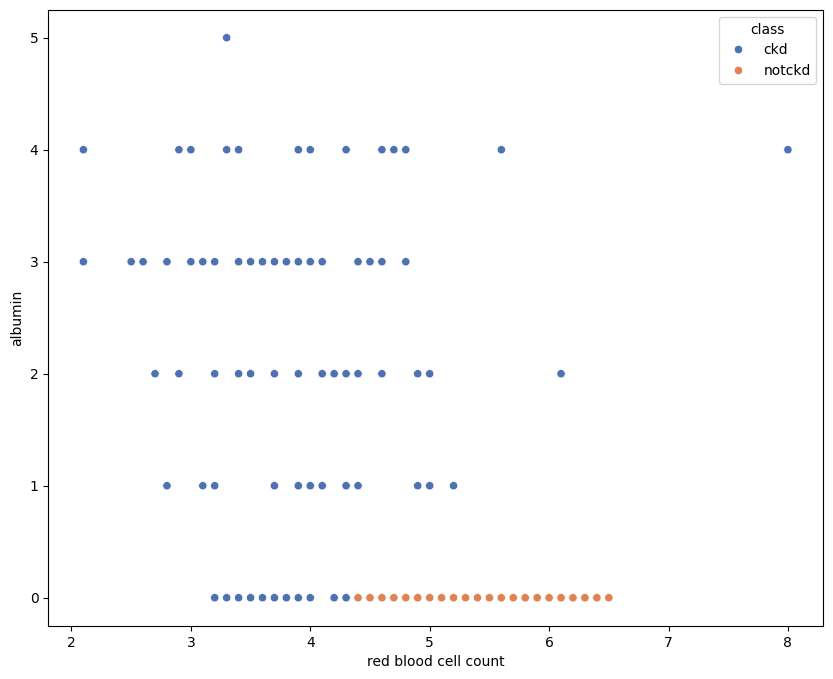

In [62]:
scatters('red blood cell count','albumin')

In [63]:
df.isna().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [64]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

<Axes: xlabel='count', ylabel='red blood cells'>

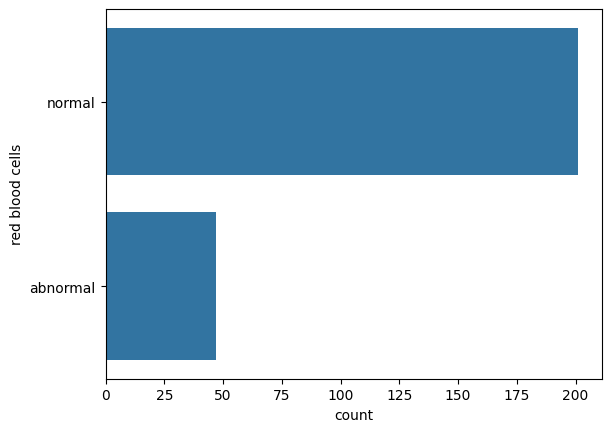

In [65]:
sns.countplot(df['red blood cells'])

In [66]:
data=df.copy()

In [67]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [68]:
data['red blood cells'].dropna().sample()

299    normal
Name: red blood cells, dtype: object

In [69]:
data['red blood cells'].isnull().sum()

152

In [70]:
random_sample=data['red blood cells'].dropna().sample(152)
random_sample

384      normal
48       normal
252      normal
340      normal
133      normal
         ...   
390      normal
292      normal
44     abnormal
386      normal
324      normal
Name: red blood cells, Length: 152, dtype: object

In [71]:
data[data['red blood cells'].isnull()].index

Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
       ...
       245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
      dtype='int64', length=152)

In [72]:
random_sample.index

Index([384,  48, 252, 340, 133, 343,  58, 352,  24, 159,
       ...
       246, 366, 155, 149, 254, 390, 292,  44, 386, 324],
      dtype='int64', length=152)

In [73]:
random_sample.index=data[data['red blood cells'].isnull()].index

In [74]:
random_sample.index

Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
       ...
       245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
      dtype='int64', length=152)

In [75]:
random_sample

0        normal
1        normal
5        normal
6        normal
10       normal
         ...   
309      normal
322      normal
349    abnormal
350      normal
381      normal
Name: red blood cells, Length: 152, dtype: object

In [76]:
data.loc[data['red blood cells'].isnull(),'red blood cells']=random_sample

In [77]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [78]:
data['red blood cells'].isnull().sum()

0

<Axes: xlabel='count', ylabel='red blood cells'>

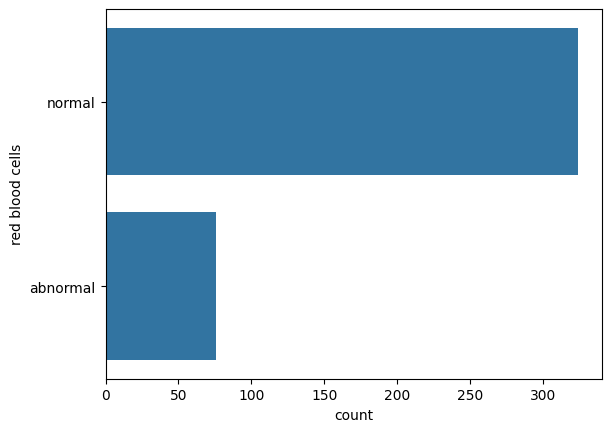

In [79]:
sns.countplot(data['red blood cells'])

In [80]:
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample

In [81]:
data[num_col].isnull().sum()

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [82]:
for col in num_col:
    Random_value_imputation(col)

In [83]:
data[num_col].isnull().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

In [84]:
data[cat_col].isnull().sum()

red blood cells             0
 pus cell                  65
pus cell clumps             4
bacteria                    4
ypertension                 2
diabetes mellitus           2
coronary artery disease     2
appetite                    1
pedal edema                 1
anemia                      1
class                       0
dtype: int64

In [85]:
Random_value_imputation(' pus cell')

In [86]:
data[cat_col].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            4
bacteria                   4
ypertension                2
diabetes mellitus          2
coronary artery disease    2
appetite                   1
pedal edema                1
anemia                     1
class                      0
dtype: int64

In [87]:
data['pus cell clumps'].mode()[0]

'notpresent'

In [88]:
def Mode_Imputation(feature):
    mode=data[feature].mode()[0]
    data[feature]=data[feature].fillna(mode)

In [89]:
for col in cat_col:
    Mode_Imputation(col)

In [90]:
data[cat_col].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [91]:
##Feature Encoding Techniques
#For Example:
#normal = 1
#abnormat = 0

data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,138.0,4.6,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,133.0,18.0,0.8,135.0,47.0,11.3,38.0,6000.0,5.0,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,146.0,5.0,9.6,31.0,7500.0,3.8,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,140.0,3.9,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [92]:
for col in cat_col:
    print('{} has {} catagories.'.format(col,data[col].nunique()))

red blood cells has 2 catagories.
 pus cell has 2 catagories.
pus cell clumps has 2 catagories.
bacteria has 2 catagories.
ypertension has 2 catagories.
diabetes mellitus has 3 catagories.
coronary artery disease has 2 catagories.
appetite has 2 catagories.
pedal edema has 2 catagories.
anemia has 2 catagories.
class has 2 catagories.


In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
le=LabelEncoder()

In [95]:
for col in cat_col:
    data[col]=le.fit_transform(data[col])

In [96]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.6,15.4,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,133.0,18.0,0.8,135.0,47.0,11.3,38.0,6000.0,5.0,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,146.0,5.0,9.6,31.0,7500.0,3.8,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,140.0,3.9,11.6,35.0,7300.0,4.6,0,1,0,0,0,0,0


In [97]:
##SELECTING BEST FEATURES FOR OUR MODEL USING SUITANLE FEATURE IMPORTANCE TECHNIQUES

In [98]:
#SelectKBest-to select k best features
from sklearn.feature_selection import SelectKBest

#chi2-Internally this class is going to check that whether probability-value is less than 0.05 or not
#based on that,it will actually order all the features

from sklearn.feature_selection import chi2

In [99]:
#Independant Columns (Features/Variables)
ind_col=[col for col in data.columns if col != 'class']

#Dependant Column (Class)
dep_col='class'

In [100]:
x=data[ind_col]
y=data[dep_col]

In [101]:
x.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.6,15.4,44.0,7800.0,5.2,1,2,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,133.0,18.0,0.8,135.0,47.0,11.3,38.0,6000.0,5.0,0,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,146.0,5.0,9.6,31.0,7500.0,3.8,0,2,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,1,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,140.0,3.9,11.6,35.0,7300.0,4.6,0,1,0,0,0,0


In [102]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int32

In [103]:
ordered_ranked_features=SelectKBest(score_func=chi2,k=20)
ordered_features=ordered_ranked_features.fit(x,y)

In [104]:
ordered_features

SelectKBest(k=20, score_func=<function chi2 at 0x000001F11CF060C0>)

In [105]:
ordered_features.scores_

array([1.08891232e+02, 7.47650773e+01, 5.46344190e-03, 2.41291866e+02,
       1.07090300e+02, 8.56296296e+00, 1.38744086e+01, 2.52000000e+01,
       1.32000000e+01, 2.69803986e+03, 2.26276631e+03, 3.55697157e+02,
       3.39102312e+01, 9.53197461e+00, 1.26140414e+02, 3.15355490e+02,
       9.90162749e+03, 2.13969116e+01, 8.82000000e+01, 2.04392523e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [106]:
data_scores=pd.DataFrame(ordered_features.scores_,columns=['Score'])


In [107]:
data_scores

,Score
0,108.891232
1,74.765077
2,0.005463
3,241.291866
4,107.090300
5,8.562963
6,13.874409
7,25.200000
8,13.200000
9,2698.039856


In [108]:
df_cols=pd.DataFrame(x.columns)
df_cols

,0
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [109]:
feature_ranked=pd.concat([df_cols,data_scores],axis=1)
feature_ranked

,0,Score
0,age,108.891232
1,blood pressure,74.765077
2,specific gravity,0.005463
3,albumin,241.291866
4,sugar,107.090300
5,red blood cells,8.562963
6,pus cell,13.874409
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2698.039856


In [110]:
feature_ranked.columns=['features','Score']
feature_ranked

,features,Score
0,age,108.891232
1,blood pressure,74.765077
2,specific gravity,0.005463
3,albumin,241.291866
4,sugar,107.090300
5,red blood cells,8.562963
6,pus cell,13.874409
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2698.039856


In [111]:
feature_ranked.nlargest(10,'Score')

,features,Score
16,white blood cell count,9901.627486
9,blood glucose random,2698.039856
10,blood urea,2262.766307
11,serum creatinine,355.697157
15,packed cell volume,315.355490
3,albumin,241.291866
14,haemoglobin,126.140414
0,age,108.891232
4,sugar,107.090300
18,ypertension,88.200000


In [112]:
selected_columns=feature_ranked.nlargest(10,'Score')['features'].values

In [113]:
selected_columns

array(['white blood cell count', 'blood glucose random', 'blood urea',
       'serum creatinine', 'packed cell volume', 'albumin', 'haemoglobin',
       'age', 'sugar', 'ypertension'], dtype=object)

In [114]:
x_new=data[selected_columns]

In [115]:
len(x_new)

400

In [116]:
x_new.shape

(400, 10)

In [117]:
#Model Building

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
x_train, x_test, y_train, y_test=train_test_split(x_new,y,random_state=0,test_size=0.25)

In [120]:
print(x_test.shape)

(100, 10)


In [121]:
print(x_train.shape)

(300, 10)


In [122]:
y_train.value_counts()

class
0    188
1    112
Name: count, dtype: int64

In [123]:
!pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\BahiJaan\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [124]:
from xgboost import XGBClassifier

In [125]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [149]:
from xgboost import XGBClassifier
classifier=XGBClassifier()

In [150]:
params ={
    'learning_rate':[0.05,0.20,0.25],
    'max_depth':[5,8,10,12],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.4],
    'colsample_bytree':[0.3,0.4,0.7]
}

In [151]:
from sklearn.model_selection import RandomizedSearchCV

In [146]:
from xgboost import XGBClassifier
classifier=XGBClassifier()

In [152]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [157]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.05, 0.2, 0.25],
                                        'max_depth': [5, 8, 10, 12],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [158]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [159]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [161]:
classifier=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None)

In [162]:
classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [164]:
y_pred=classifier.predict(x_test)

In [165]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [166]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [169]:
confusion=confusion_matrix(y_test,y_pred)
confusion

array([[60,  2],
       [ 0, 38]], dtype=int64)

In [171]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.98

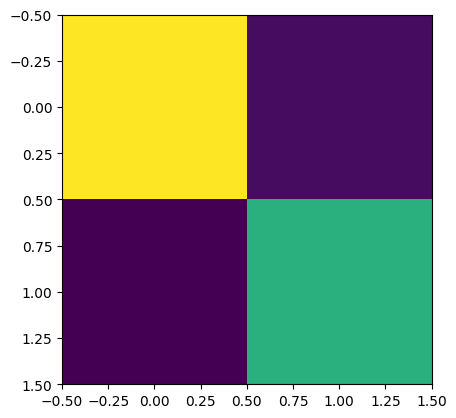

In [170]:
plt.imshow(confusion)